# Exploratory Data Analysis – Fish Dataset

## Project Goal
The goal of this analysis is to explore the relationship between physical measurements of fish and their weight, and to assess whether a simple linear regression model can describe this relationship.

## Dataset
### Dataset Description

The Fish dataset contains measurements of 159 individual fish from seven different species.  
Each observation represents a single fish and includes both categorical and numerical variables.

The categorical variable `Species` identifies the fish species, while the numerical variables describe physical characteristics such as weight, multiple length measurements, height, and width. All measurements are continuous and recorded in consistent units.

The dataset is well suited for exploratory data analysis, as it allows for the investigation of differences between species as well as the relationship between physical dimensions and fish weight.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv("../data/raw/Fish.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Dataset Overview

The dataset contains 159 observations and 7 variables.  
There is one categorical variable (`Species`) and six numerical variables describing fish measurements (`Weight`, three length measures, `Height`, and `Width`).  
All variables have complete data with no missing values.


In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


During the exploratory analysis, one observation with a recorded fish weight of 0 was identified. 
Since a weight of zero is not physically plausible given the corresponding size measurements, this observation is treated as a data entry error and removed for subsequent analyses.

In [7]:
df[df["Weight"] == 0]
df_clean = df[df["Weight"] > 0].copy()
df_clean.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


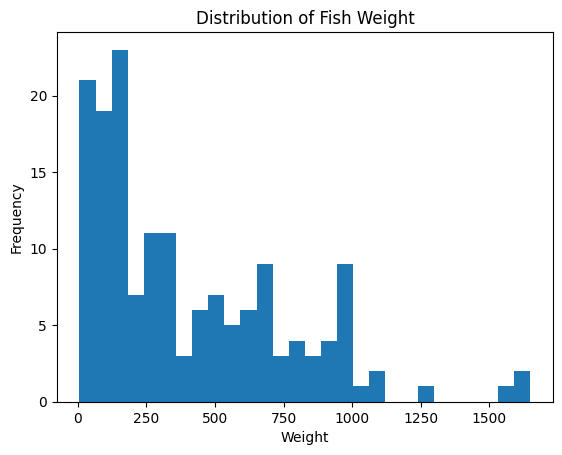

In [12]:
plt.figure()
df_clean["Weight"].plot(kind="hist", bins=28)
plt.title("Distribution of Fish Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


The histogram shows that most fish in the dataset have relatively low weights (below 300), while a smaller number of fish exhibit much higher weights, resulting in a right-skewed distribution.